In [85]:
### Import list ###



import tensorflow as tf
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import pathlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout
from keras.callbacks import TensorBoard



In [86]:
### Clean data ###

data_folder = 'data'
img_exts = ['.jpeg', '.png','.bmp']


for image_class in os.listdir(data_folder) :
    print(image_class)
    for image in os.listdir(os.path.join(data_folder,image_class)):
        img_path = os.path.join(data_folder,image_class,image)
        try:
            img_test = cv2.imread(img_path)
            img_ext = pathlib.Path(img_path).suffix

            if img_ext not in img_exts:
                os.remove(img_path)
        except Exception as  e :
            print(e)


happy
sad


In [87]:
### convert data imag to numpy ###

data  =  tf.keras.utils.image_dataset_from_directory('data')
data = data.map(lambda x,y:(x/255,y))
data_iterator = data.as_numpy_iterator()

Found 84 files belonging to 2 classes.


In [88]:
batch=data_iterator.next()

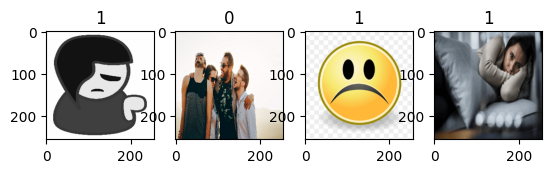

In [89]:
fig , ax = plt.subplots(ncols=4)
for idx ,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [90]:
### Split Data ###

print(len(data))

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size= int((len(data)*.1)+1)

train= data.take(train_size)
val = data.skip(train_size).take(val_size)
test=data.skip(test_size+test_size).take(test_size)


3


In [91]:
### Import model and train data ###




In [92]:
model = Sequential()

In [93]:
### Configuration Model ###

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [94]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 16)       

In [95]:
### Train data ###

logdir='logs'
tansorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [96]:
### Fit the model ###

tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)

hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard])

Epoch 1/20
2/2 [==============================] - 4s 2s/step - loss: 0.7777 - accuracy: 0.5781 - val_loss: 0.5681 - val_accuracy: 0.6000
Epoch 2/20
2/2 [==============================] - 3s 1s/step - loss: 0.6472 - accuracy: 0.5781 - val_loss: 0.5779 - val_accuracy: 0.9000
Epoch 3/20
2/2 [==============================] - 2s 1s/step - loss: 0.5422 - accuracy: 0.8906 - val_loss: 0.5300 - val_accuracy: 0.6500
Epoch 4/20
2/2 [==============================] - 3s 2s/step - loss: 0.5407 - accuracy: 0.6094 - val_loss: 0.3713 - val_accuracy: 0.7500
Epoch 5/20
2/2 [==============================] - 3s 2s/step - loss: 0.3511 - accuracy: 0.8125 - val_loss: 0.3455 - val_accuracy: 0.9500
Epoch 6/20
2/2 [==============================] - 3s 2s/step - loss: 0.3020 - accuracy: 0.9219 - val_loss: 0.2149 - val_accuracy: 0.9000
Epoch 7/20
2/2 [==============================] - 3s 2s/step - loss: 0.3227 - accuracy: 0.8281 - val_loss: 0.2444 - val_accuracy: 0.9500
Epoch 8/20
2/2 [=========================

In [100]:
hist.history

{'loss': [0.7776629328727722,
  0.6472045183181763,
  0.5422031879425049,
  0.5407341122627258,
  0.3511244058609009,
  0.3019567131996155,
  0.32267510890960693,
  0.3044661581516266,
  0.22228071093559265,
  0.235662579536438,
  0.16021811962127686,
  0.14632701873779297,
  0.09874345362186432,
  0.05632474273443222,
  0.050451621413230896,
  0.02487487904727459,
  0.022529236972332,
  0.02395419403910637,
  0.009074743837118149,
  0.006476145703345537],
 'accuracy': [0.578125,
  0.578125,
  0.890625,
  0.609375,
  0.8125,
  0.921875,
  0.828125,
  0.890625,
  0.90625,
  0.921875,
  0.96875,
  0.984375,
  0.984375,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.5680838227272034,
  0.5779342651367188,
  0.5300332307815552,
  0.3712587356567383,
  0.34547924995422363,
  0.2149159163236618,
  0.24439303576946259,
  0.1661253422498703,
  0.1477680653333664,
  0.10414566844701767,
  0.13968822360038757,
  0.12322069704532623,
  0.06572433561086655,
  0.06424347311258316

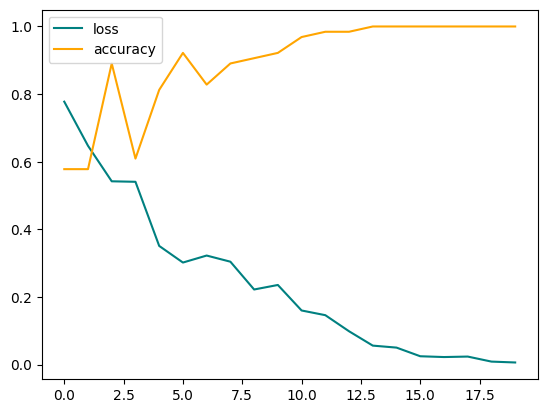

In [103]:
### show performance graf

fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label="loss")
plt.plot(hist.history['accuracy'],color = 'orange',label="accuracy")
#fig.suptitle('Loss',frontsize=20)
plt.legend(loc='upper left')
plt.show()

In [104]:
### Validete Performance ###

from tensorflow.keras.metrics import Precision, Recall,BinaryAccuracy

In [106]:
pre=Precision()
re = Recall()
ac = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    x,y = batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    ac.update_state(y,yhat)

1/1 [==============================] - 0s 191ms/step


In [108]:
print(f'Precision : {pre.result()} , Recall : {re.result()} , BinaryAccuracy : {ac.result()}')

Precision : 1.0 , Recall : 1.0 , BinaryAccuracy : 1.0


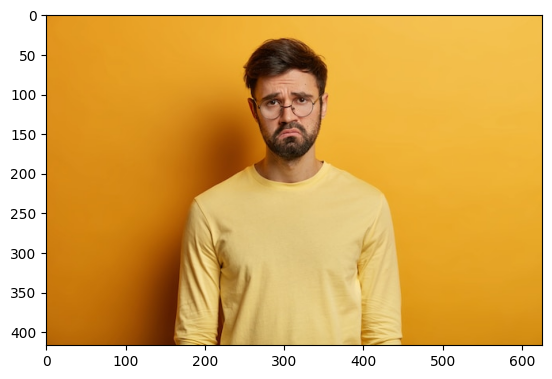

In [153]:
### Test Model ###

imgg = cv2.imread('./sad.jpeg')
plt.imshow(cv2.cvtColor(imgg,cv2.COLOR_BGR2RGB))
plt.show()

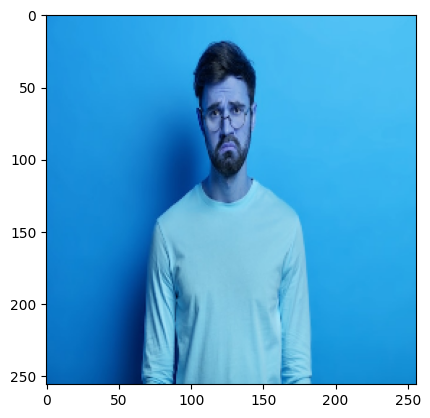

In [154]:
### Resize image ###

resize = tf.image.resize(imgg,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [155]:


res = model.predict(np.expand_dims(resize/255,0))
if res > 0.5 :
    print("sad person")
else :
    print("happy person")

1/1 [==============================] - 0s 31ms/step
sad person
